In [1]:
# Create Adversarial Cross Sections like image below
# compare Classic vs FGN

![](https://lh5.googleusercontent.com/DNP_DKcOfg3blxS3PZDjrww6SmtsxEae1IqOqredx9HLLWhmpsl7Bcm_THlkLxhKmA024Qcg3klt5FdIqv2ijBBuhS1Nl6VHoUDQr3wM=s1017)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [4]:
import numpy as np
import torch

In [5]:
# custom library imports
import sys
sys.path.append('/home/felix/Research/Adversarial Research/FGN---Research/')
import Finite_Gaussian_Network_lib as fgnl
import Finite_Gaussian_Network_lib.fgn_helper_lib as fgnh

In [6]:
# check gpus
!gpustat

countdown               Wed Jul 29 02:22:28 2020  418.87.01
[0] GeForce RTX 2080 Ti | 86'C,  94 % |  9343 / 10989 MB | soumi(4857M) soumi(4475M)
[1] GeForce RTX 2080 Ti | 88'C, 100 % |  7805 / 10988 MB | soumi(3933M) soumi(3659M) root(201M)


In [7]:
# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
use_cuda = False
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")
print("Using device:", device)

# manualy set cuda device
torch.cuda.set_device(1)

CUDA Available:  True
Using device: cpu


In [8]:
# get data 
(mnist_train_loader, mnist_val_loader, mnist_test_loader) = fgnh.mnist_dataloaders(batch_size=10000, 
                                                                                   batch_size_for_val=10000)

In [9]:
# load classic model
classic_model_path = "../Experiments/sample_models/sample_classic_full.pth"
classic_model = torch.load(classic_model_path)
classic_model.to(device)

Feedforward_Classic_net(
  (hidden_layers): ModuleList(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.2, inplace=False)
  )
  (ib): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): Linear(in_features=64, out_features=10, bias=True)
)

In [10]:
# classic model params
!cat '../Experiments/sample_models/sample_FGN_parameters.txt'

hidden_layer_sizes [64, 64]
drop_p 0.2
batch_size 4000
optimizer Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)
ordinal 2.0
covar_type sphere
lambda for l2 loss 8e-06
lambda for sigma loss 1e-06
non-linearity True


In [11]:
# load an fgn model check same params as FGN
fgn_model_path = '../Experiments/sample_models/sample_FGN_full.pth'
fgn_model = torch.load(fgn_model_path)
fgn_model.to(device)

Feedforward_FGN_net(
  (hidden_layers): ModuleList(
    (0): Dropout(p=0.2, inplace=False)
    (1): FGN_layer()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): FGN_layer()
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.2, inplace=False)
  )
  (ib): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): FGN_layer()
)

In [241]:
# convert model
fgnl.convert_classic_to_fgn(classic_model, fgn_model, init_factor=1.5e0, verbose=True)

odict_keys([])

Classic odict_keys(['hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'hidden_layers.2.running_mean', 'hidden_layers.2.running_var', 'hidden_layers.2.num_batches_tracked', 'hidden_layers.4.weight', 'hidden_layers.4.bias', 'hidden_layers.5.weight', 'hidden_layers.5.bias', 'hidden_layers.5.running_mean', 'hidden_layers.5.running_var', 'hidden_layers.5.num_batches_tracked', 'ib.weight', 'ib.bias', 'ib.running_mean', 'ib.running_var', 'ib.num_batches_tracked', 'fl.weight', 'fl.bias'])
FGN odict_keys(['hidden_layers.1.weights', 'hidden_layers.1.biases', 'hidden_layers.1.centers', 'hidden_layers.1.inv_covars', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'hidden_layers.2.running_mean', 'hidden_layers.2.running_var', 'hidden_layers.2.num_batches_tracked', 'hidden_layers.4.weights', 'hidden_layers.4.biases', 'hidden_layers.4.centers', 'hidden_layers.4.inv_covars', 'hidden_layers.5.weight', 'hidden_layers.5.bias', 'hidden_la

In [13]:
# load heavily retrained model
ret_fgn_model_path = '../Experiments/sample_models/sample_fgn_converted+retrained_full.pth'
ret_fgn_model = torch.load(ret_fgn_model_path)
ret_fgn_model.to(device)

Feedforward_FGN_net(
  (hidden_layers): ModuleList(
    (0): Dropout(p=0.2, inplace=False)
    (1): FGN_layer()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): FGN_layer()
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.2, inplace=False)
  )
  (ib): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): FGN_layer()
)

In [14]:
model = ret_fgn_model

/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


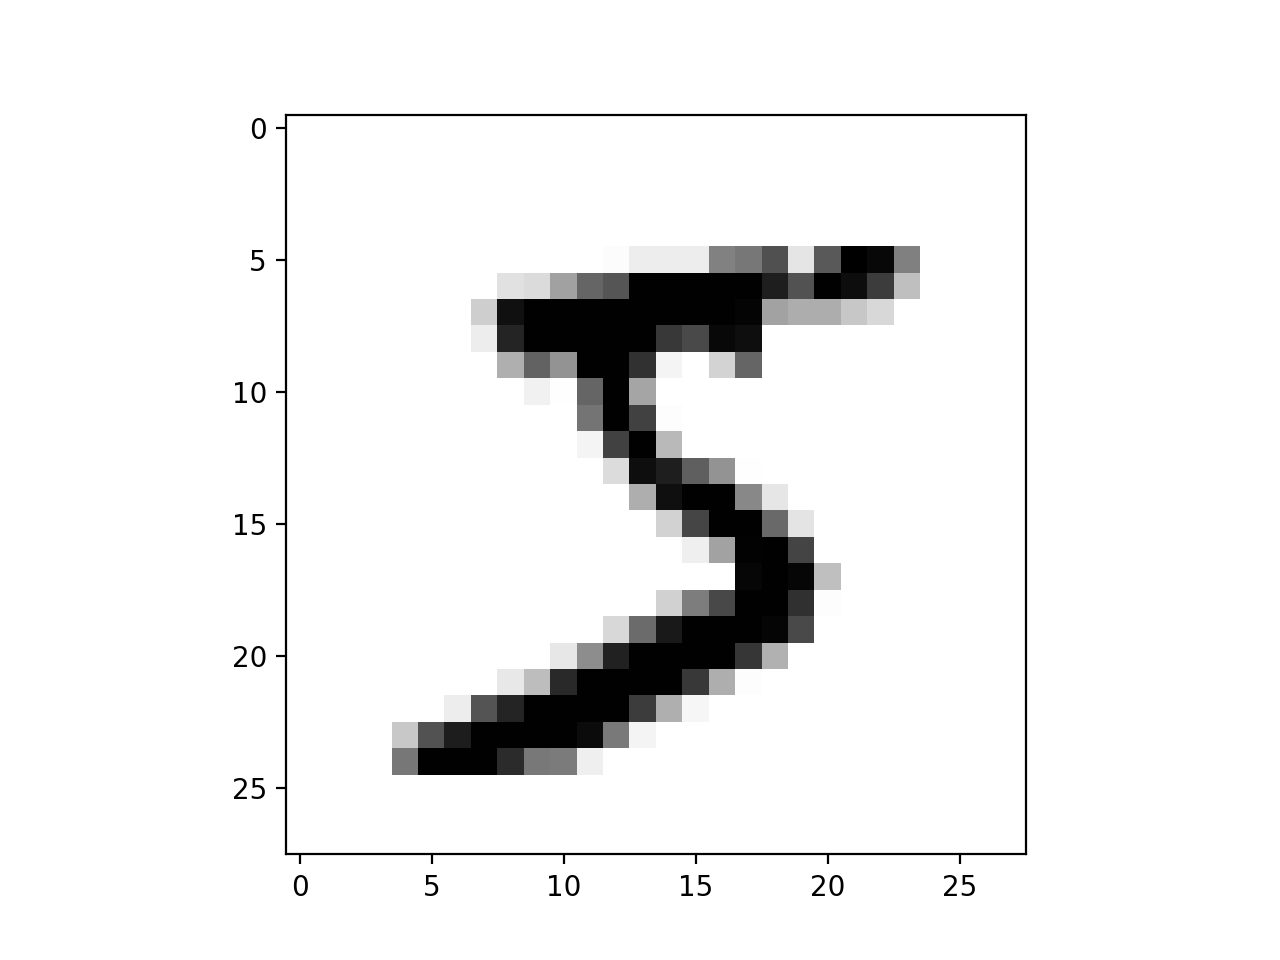

In [207]:
# test image
img = mnist_train_loader.dataset.tensors[0][0]

plt.imshow(img.numpy(), cmap='gray_r')
plt.show()

In [16]:
from torch.autograd import Variable
img = Variable(img, requires_grad=True)

In [17]:
target = mnist_train_loader.dataset.tensors[1][0:1]
print(target)

tensor([5])


In [18]:
# set model to eval mode
model.eval()

Feedforward_FGN_net(
  (hidden_layers): ModuleList(
    (0): Dropout(p=0.2, inplace=False)
    (1): FGN_layer()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): FGN_layer()
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.2, inplace=False)
  )
  (ib): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fl): FGN_layer()
)

In [19]:
from torch.autograd.gradcheck import zero_gradients

In [20]:
# reset the gradients
zero_gradients(img)

In [21]:
# compute model output for current adv_input
cur_out = model(img.to(device))
cur_pred = cur_out.data.max(1)[1]
cur_class = cur_pred.cpu().numpy()[0]

In [22]:
cur_out.detach().cpu().numpy().round()

array([[-0.,  0.,  0., 13., -0.,  0., -0.,  0.,  1.,  0.]], dtype=float32)

In [23]:
# loss func
loss_func = torch.nn.CrossEntropyLoss()

In [24]:
cur_loss = loss_func(cur_out, torch.tensor([1]).to(device))

In [25]:
# apply backprob
cur_loss.backward()

In [26]:
# check adversarial
epsilon = 0.01
model((img + epsilon*torch.sign(img.grad.data)).to(device)).detach().cpu().numpy().round()

array([[-0.,  2.,  1.,  1.,  0.,  1.,  0.,  1., -0.,  0.]], dtype=float32)

In [27]:
# the adversarial direction
fgsm_dir = torch.sign(img.grad.data)
print(fgsm_dir.norm(p=2))

tensor(28.)


In [208]:
fgms_dir = get_fgsm_attack_vectors(classic_model, img , loss_func)

In [209]:
classic_model(img.to(device)).detach().cpu().numpy().round()

array([[-3.,  1., -3.,  6., -6., 12., -2., -2.,  1., -0.]], dtype=float32)

In [213]:
classic_model((img + 0.01*fgms_dir).to(device)).detach().cpu().numpy().round()

array([[-1., -2., -1.,  2., -2.,  1., -3., -2.,  8.,  2.]], dtype=float32)

In [28]:
import matplotlib.colors

def categorical_cmap(nc, nsc, cmap="tab10", continuous=False, reverse=False):
    
    # The following would be a function categorical_cmap, 
    # which takes as input the number of categories (nc) and the number of subcategories (nsc) 
    # and returns a colormap with nc*nsc different colors, 
    # where for each category there are nsc colors of same hue.
    # 'reverse' controls if the most intense color is at the start (default) or the end
    # source: https://stackoverflow.com/questions/47222585/matplotlib-generic-colormap-from-tab10
    
    if nc > plt.get_cmap(cmap).N:
        raise ValueError("Too many categories for colormap.")
    if continuous:
        ccolors = plt.get_cmap(cmap)(np.linspace(0,1,nc))
    else:
        ccolors = plt.get_cmap(cmap)(np.arange(nc, dtype=int))
    
    cols = np.zeros((nc*nsc, 3))
    for i, c in enumerate(ccolors):
        chsv = matplotlib.colors.rgb_to_hsv(c[:3])
        arhsv = np.tile(chsv,nsc).reshape(nsc,3)
        arhsv[:,1] = np.linspace(chsv[1],0, nsc)
        arhsv[:,2] = np.linspace(chsv[2],1, nsc)
        if reverse:
            rgb = matplotlib.colors.hsv_to_rgb(arhsv[::-1])
        else:
            rgb = matplotlib.colors.hsv_to_rgb(arhsv)
        cols[i*nsc:(i+1)*nsc,:] = rgb       
    cmap = matplotlib.colors.ListedColormap(cols)
    return cmap

c10 = categorical_cmap(10, 9, cmap='tab10', reverse=True, continuous=False)

In [29]:
def gen_rand_orthogonal(t):
    # given a pytorch tensor, returns a random orthogonal vector of same norm
    # https://stackoverflow.com/questions/33658620/generating-two-orthogonal-vectors-that-are-orthogonal-to-a-particular-direction
    # suffers from numerical instability
    
    # normalize t
    t2 = t/torch.norm(t, p=2)
    rand_orthogonal =  torch.rand_like(t2.flatten())
    rand_orthogonal -= t2.flatten().dot(rand_orthogonal) * t2.flatten()
    # normalize
    rand_orthogonal /= torch.norm(rand_orthogonal, p=2)
    # reshape
    rand_orthogonal = rand_orthogonal.reshape_as(t2)
    
#     make same norm as t
    rand_orthogonal *= torch.norm(t, p=2) 
    
    return(rand_orthogonal)

In [30]:
def rand_orthogonal_set(t, mode='canonical'):
    # given a tensor t, returns a random or canonical set orthognal vectors to t
    # (probably not uniformly sampled)
    # no check if it's actually invertible
    
    # normalize t
    t2 = t.flatten() / t.norm()
    
    if mode=='random':
        r = torch.stack([torch.rand_like(t2) for _ in range(len(t2)-1)])
    if mode=='canonical':
        r = torch.eye(len(t2)-1,len(t2))
    
    A = torch.cat((t2.unsqueeze(0),r)).T
    
    Q,R = torch.qr(A)
    
    # reshape back to orignal, renorm back to original
    r = torch.stack([t.norm()* q.reshape_as(t) for q in Q.T])
    
    # the first elem is either t or -t, just replace it
    r[0] = t
    return r


In [31]:
# rv = [gen_rand_orthogonal(fgsm_dir) for _ in range(20)]
rv = rand_orthogonal_set(fgsm_dir, mode='random')

In [32]:
np.argmin(np.abs([r.flatten().dot(fgsm_dir.flatten()).item() for r in rv]))

94

In [33]:
# pick the most orthogonal
orth_fgsm_dir = rv[np.argmin(np.abs([r.flatten().dot(fgsm_dir.flatten()).item() for r in rv]))]
print(orth_fgsm_dir.flatten().dot(fgsm_dir.flatten()))
print(orth_fgsm_dir.norm())

tensor(0.)
tensor(28.0000)


In [34]:
# define the grid for the heat map
grid_size = 50 # will be a (2*grid_size)**2 points

In [35]:
X = np.linspace(-epsilon, epsilon, 2*grid_size+1)
Y = np.linspace(-epsilon, epsilon, 2*grid_size+1)
Xs, Ys = np.meshgrid(X,Y)

In [36]:
np.shape(Xs)

(101, 101)

In [37]:
np.shape([Xs, Ys])

(2, 101, 101)

In [38]:
# cartestian product
XYs = np.array(list(zip(Xs.ravel(), Ys.ravel())))
print(XYs)

[[-0.001   -0.001  ]
 [-0.00098 -0.001  ]
 [-0.00096 -0.001  ]
 ...
 [ 0.00096  0.001  ]
 [ 0.00098  0.001  ]
 [ 0.001    0.001  ]]


In [39]:
inputs_list = [ img.detach() + x_step*fgsm_dir + y_step*orth_fgsm_dir
               for x_step, y_step in XYs]

In [40]:
inputs = torch.stack(inputs_list)

In [41]:
np.shape(inputs)

torch.Size([10201, 28, 28])

In [42]:
with torch.no_grad(): heatmap_preds = model(inputs.to(device))

In [43]:
# apply softmax for probs, nans are replaced by 1.0 
heatmap_preds_softmax = np.nan_to_num(np.array([np.exp(x)/sum(np.exp(x)) 
                                                for x in heatmap_preds.cpu().numpy()]), nan=1.0)

In [44]:
XYs.shape, heatmap_preds_softmax.shape

((10201, 2), (10201, 10))

In [45]:
# reshape back to original?
testX, testY = np.array(list(zip(*XYs))).reshape(2,1+2*grid_size,1+2*grid_size)
print(testX)
print(testY)

[[-0.001   -0.00098 -0.00096 ...  0.00096  0.00098  0.001  ]
 [-0.001   -0.00098 -0.00096 ...  0.00096  0.00098  0.001  ]
 [-0.001   -0.00098 -0.00096 ...  0.00096  0.00098  0.001  ]
 ...
 [-0.001   -0.00098 -0.00096 ...  0.00096  0.00098  0.001  ]
 [-0.001   -0.00098 -0.00096 ...  0.00096  0.00098  0.001  ]
 [-0.001   -0.00098 -0.00096 ...  0.00096  0.00098  0.001  ]]
[[-0.001   -0.001   -0.001   ... -0.001   -0.001   -0.001  ]
 [-0.00098 -0.00098 -0.00098 ... -0.00098 -0.00098 -0.00098]
 [-0.00096 -0.00096 -0.00096 ... -0.00096 -0.00096 -0.00096]
 ...
 [ 0.00096  0.00096  0.00096 ...  0.00096  0.00096  0.00096]
 [ 0.00098  0.00098  0.00098 ...  0.00098  0.00098  0.00098]
 [ 0.001    0.001    0.001   ...  0.001    0.001    0.001  ]]


In [46]:
pred_classes = np.argmax(heatmap_preds_softmax, axis=1)
pred_confidences = np.max(heatmap_preds_softmax, axis=1)

In [47]:
to_plot = [pred_class+0.9*pred_confidence for pred_class, pred_confidence in zip(pred_classes, pred_confidences)]

In [48]:
print(np.shape(to_plot))
print(np.shape(Xs))

(10201,)
(101, 101)


In [49]:
to_plot = np.reshape(to_plot, np.shape(Xs))
# Xs, Ys = np.reshape(list(zip(*XYs)), (2, 1+2*grid_size, 1+2*grid_size))

<IPython.core.display.Javascript object>


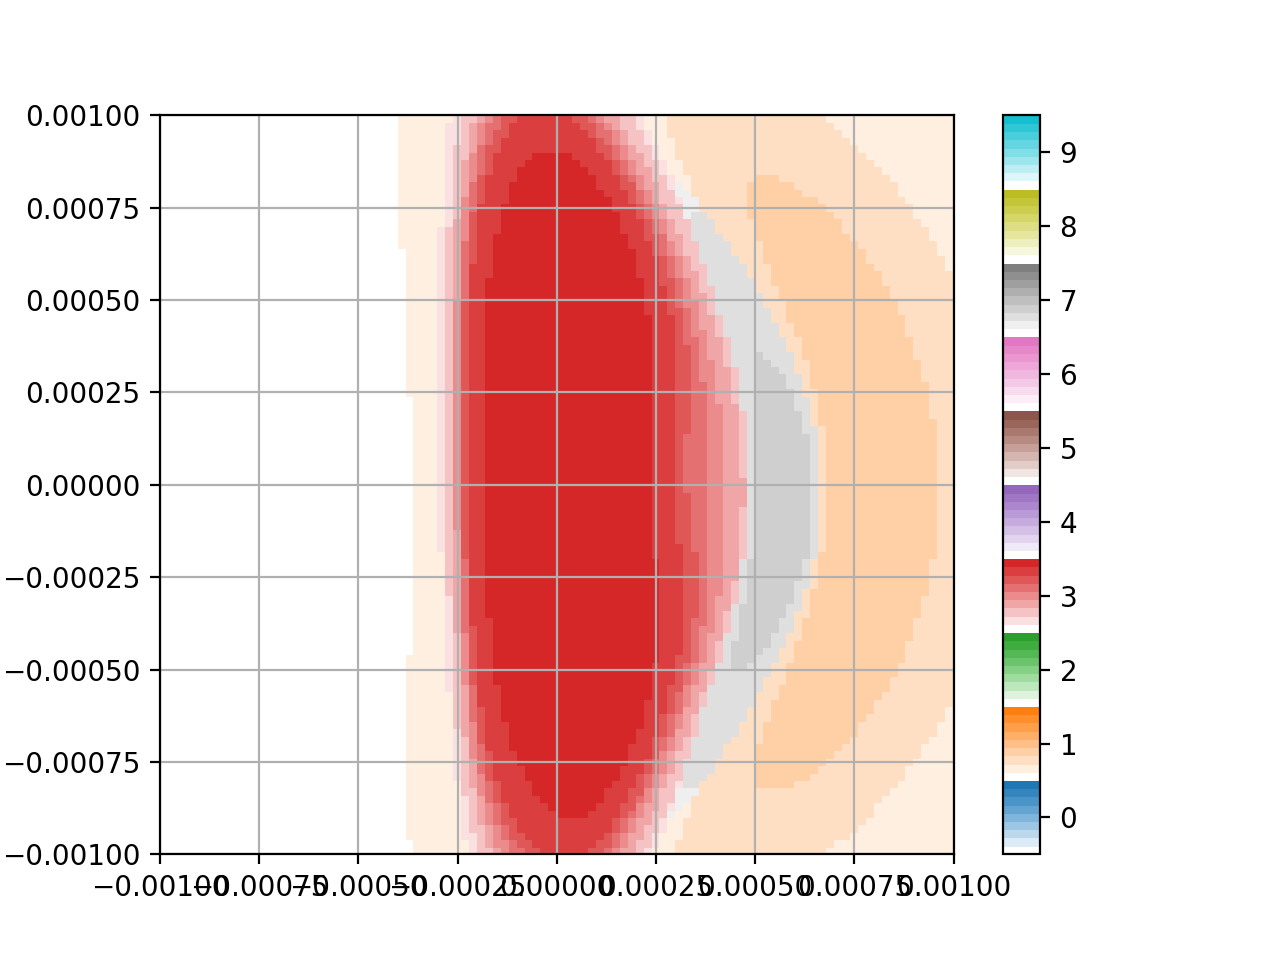

In [50]:
plt.pcolormesh(Xs, Ys,
               to_plot, cmap=c10, vmin=0, vmax=10, shading='auto')
cbar = plt.colorbar( ticks=[x+0.5 for x in range(10)])
cbar.ax.set_yticklabels(range(10))
plt.grid()
plt.show()

In [214]:
def get_fgsm_attack_vectors(model, samples, loss_func):
    # given a model and some samples
    # returns the untargeted attack vectors given by FGSM for this loss function
    
    # get model device 
    device = next(model.parameters()).device
    
    samples_as_var = Variable(samples, requires_grad=True)
    
    # set model to eval mode
    model.eval()

    # compute model output 
    cur_out = model(samples_as_var.to(device))
    _, pred_classes = torch.max(cur_out, dim=1, keepdim=False)
        
    # compute loss
    cur_losses = loss_func(cur_out, pred_classes)
    
    # apply backprob
    cur_losses.backward()
    
    
    # the adversarial directions
    fgsm_dirs = torch.sign(samples_as_var.grad.data)
    
    return fgsm_dirs

In [269]:
def plot_MNIST_hyperborders(model, start, end, n_plots=5, grid_size=100, mode='canonical', title=None):
    
    # pre-requisites
    # colors = c10
    # rand_orthogonal_set
    
    # device
    # get model device 
    device = next(model.parameters()).device
    
    # set model in eval mode
    model.eval()    
    
    # plots a n_plot*nplot grid
    fig, axes = plt.subplots(nrows=n_plots, ncols=n_plots)   
    
    if title is not None: fig.suptitle(title)
    
    # vector-tensor from start to end
    v0 = end-start
    
    # set of orthogonal vectors to v0, 
    Vs = rand_orthogonal_set(v0, mode=mode)
    
    # check that not too many plots is asked
    assert len(Vs)>n_plots**2
    
    # define the XY grid
    X = np.linspace(0, 1, grid_size+1)
    Y = np.linspace(-1, 1, grid_size)
    Xs, Ys = np.meshgrid(X,Y)
    # cartestian product
    XYs = np.array(list(zip(Xs.ravel(), Ys.ravel())))
    
    
    for r in range(n_plots):
        for c in range(n_plots):
            
            # new inputs
            inputs_list = [start + x_step*v0 + y_step*Vs[1+r*n_plots+c] for x_step, y_step in XYs]
            inputs = torch.stack(inputs_list)
            # compute Zs
            with torch.no_grad(): heatmap_preds = model(inputs.to(device))
            
            # apply softmax for probs, nans are replaced by 1.0 
            heatmap_preds_softmax = np.nan_to_num(np.array([np.exp(x)/sum(np.exp(x)) 
                                                            for x in heatmap_preds.cpu().numpy()]), nan=1.0)
            
            pred_classes = np.argmax(heatmap_preds_softmax, axis=1)
            pred_confidences = np.max(heatmap_preds_softmax, axis=1)
            
            to_plot = [pred_class+0.9*pred_confidence 
                       for pred_class, pred_confidence in zip(pred_classes, pred_confidences)]

            to_plot = np.reshape(to_plot, np.shape(Xs))

            # plot using pcolormesh
            pcm = axes[r,c].pcolormesh(Xs, Ys,
                                 to_plot, 
                                 cmap=c10, vmin=0, vmax=10, shading='auto')
            axes[r,c].xaxis.set_visible(False)
            axes[r,c].yaxis.set_visible(False)
    
    cbar = fig.colorbar(pcm, ax=axes.ravel().tolist(), ticks=[x+0.5 for x in range(10)])
    cbar.ax.set_yticklabels(range(10))
    
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('MNIST Class x Confidence', rotation=270)
    
    # end 
    plt.show()
    

In [281]:
img = mnist_train_loader.dataset.tensors[0][11]
loss_func = torch.nn.CrossEntropyLoss()
epsilon=0.04

/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


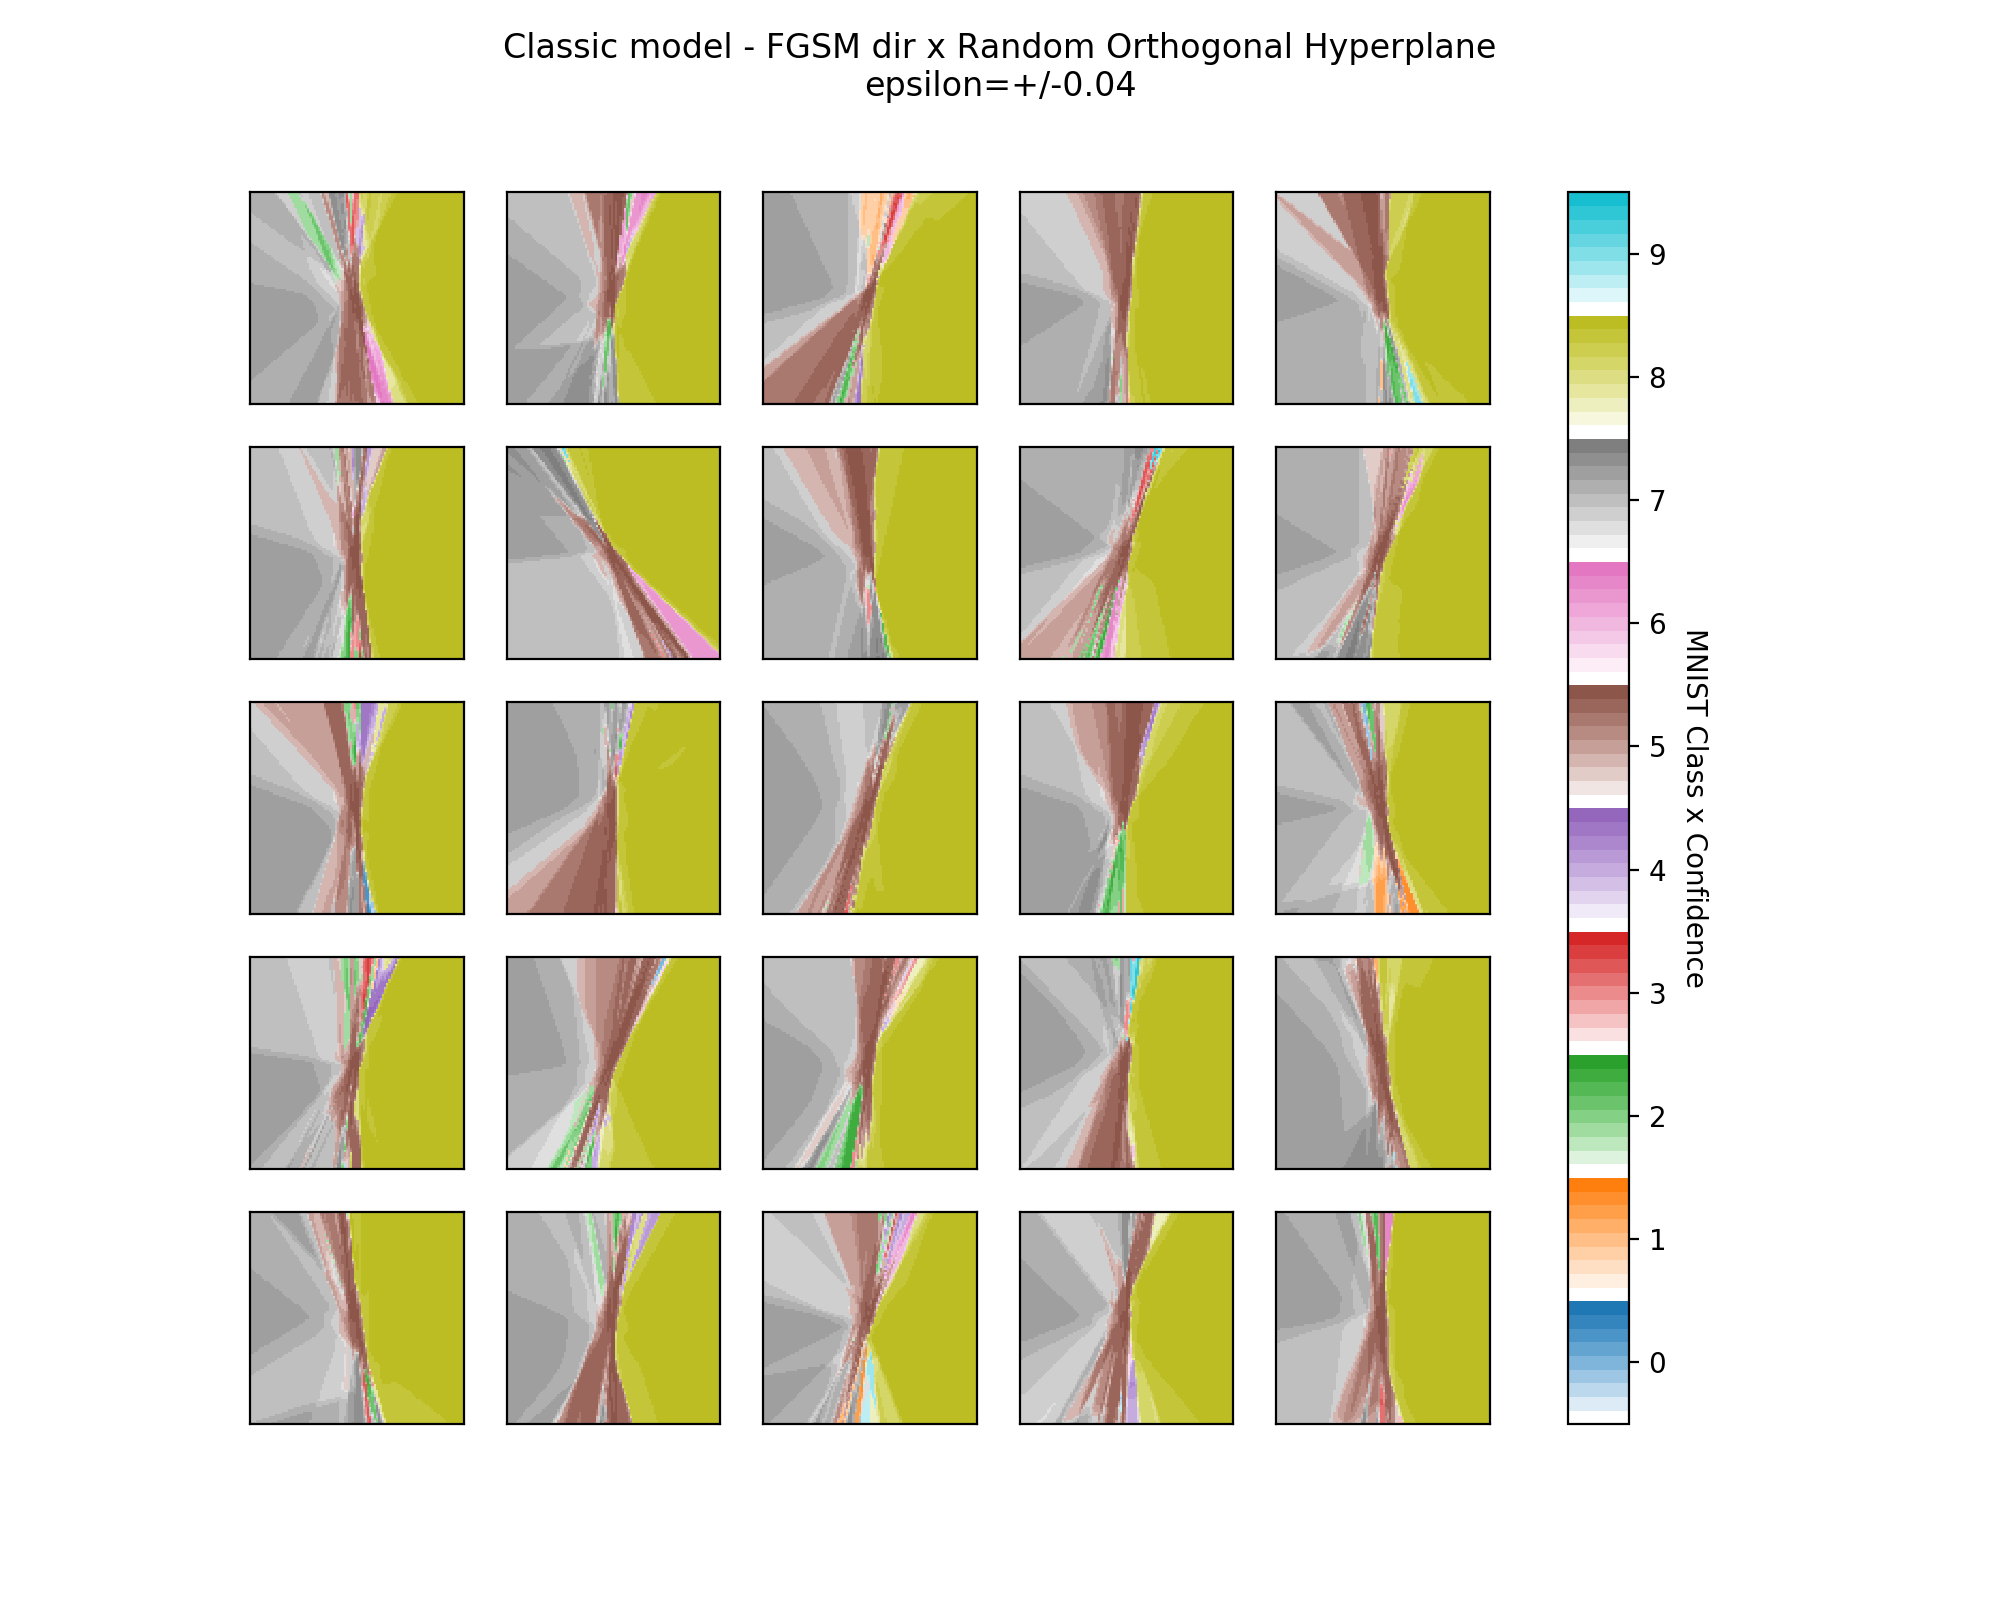

In [282]:
classic_fgsm_vec = get_fgsm_attack_vectors(classic_model, img, loss_func)

plot_MNIST_hyperborders(classic_model, img-epsilon*classic_fgsm_vec, img+epsilon*classic_fgsm_vec, 
                        n_plots=5, grid_size=100, mode='random',
                        title='Classic model - FGSM dir x Random Orthogonal Hyperplane\nepsilon=+/-{}'.format(epsilon))

/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


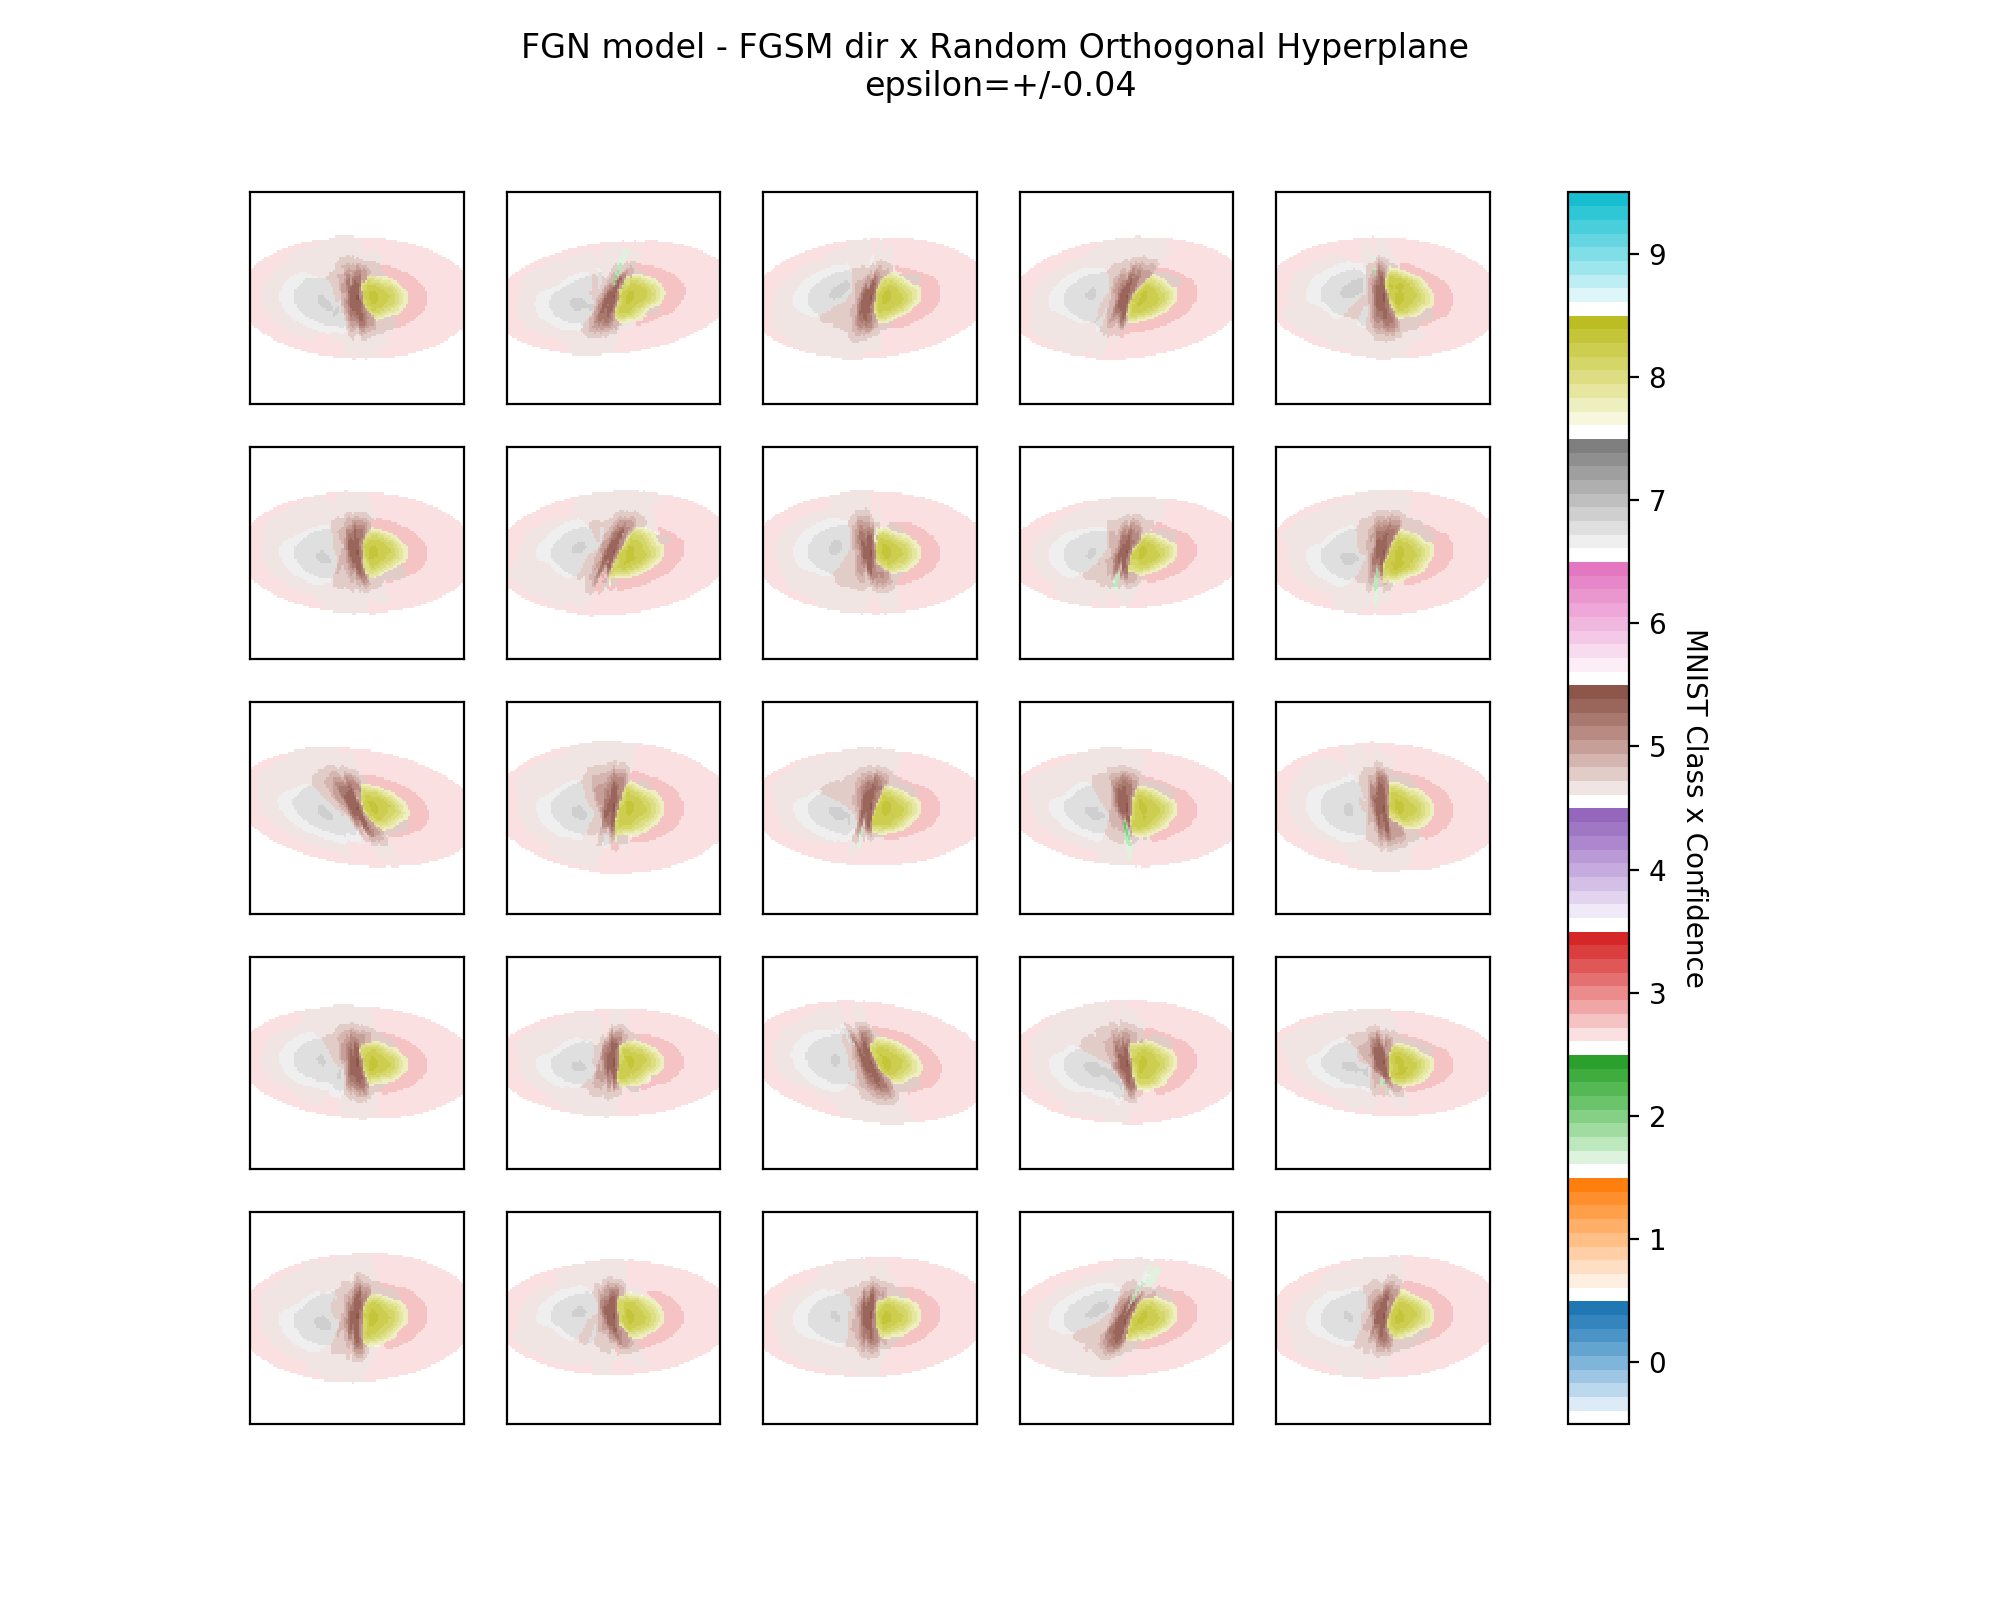

In [283]:
fgn_fgsm_vec = get_fgsm_attack_vectors(fgn_model, img, loss_func)

plot_MNIST_hyperborders(fgn_model, img-epsilon*fgn_fgsm_vec, img+epsilon*fgn_fgsm_vec, 
                        n_plots=5, grid_size=100, mode='random',
                        title='FGN model - FGSM dir x Random Orthogonal Hyperplane \nepsilon=+/-{}'.format(epsilon))

/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


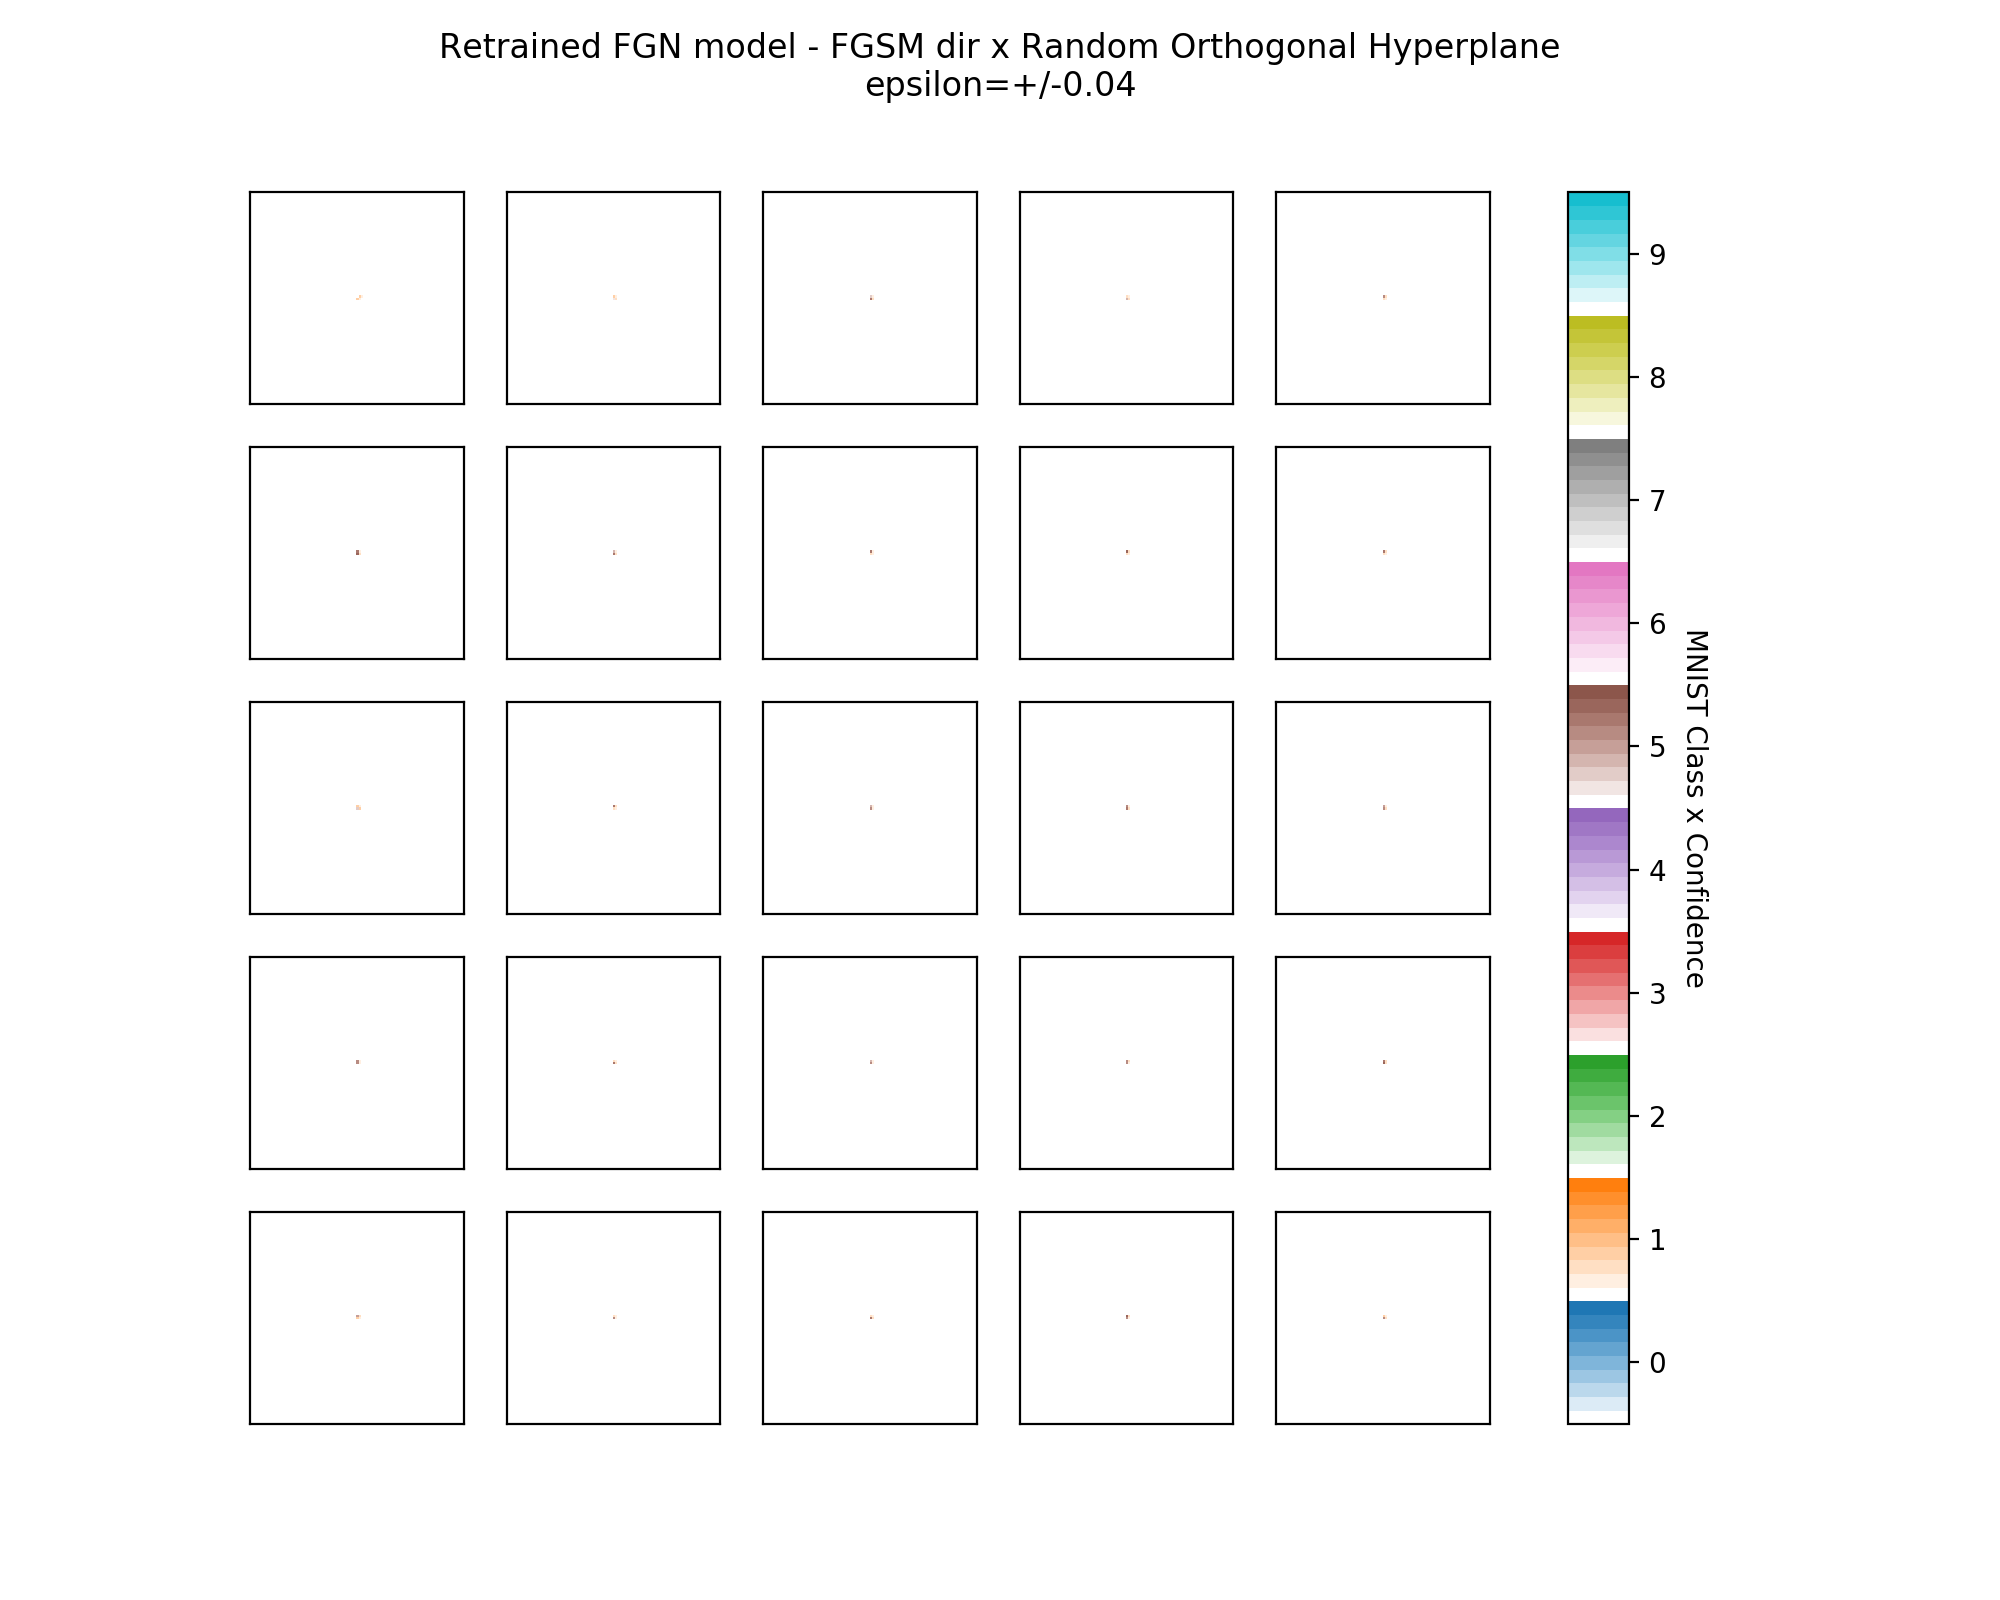

In [284]:
ret_fgn_fgsm_vec = get_fgsm_attack_vectors(ret_fgn_model, img, loss_func)

plot_MNIST_hyperborders(ret_fgn_model, img-epsilon*ret_fgn_fgsm_vec, img+epsilon*ret_fgn_fgsm_vec, 
                        n_plots=5, grid_size=100, mode='random',
                        title='Retrained FGN model - FGSM dir x Random Orthogonal Hyperplane\nepsilon=+/-{}'.format(epsilon))